régression linéaire simple numpy

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

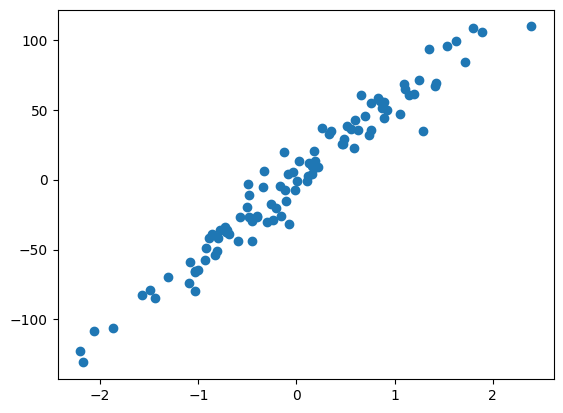

In [2]:
x, y = make_regression(n_samples = 100, n_features = 1, noise = 10)
plt.scatter(x, y)

In [5]:
print(x.shape)
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)
(100, 1)


In [7]:
X = np.hstack((x, np.ones(x.shape)))
X

array([[-0.23513255,  1.        ],
       [-0.80075122,  1.        ],
       [-0.33910687,  1.        ],
       [-0.30173402,  1.        ],
       [ 0.56007591,  1.        ],
       [-1.4975941 ,  1.        ],
       [-0.11335118,  1.        ],
       [ 0.32929674,  1.        ],
       [-0.92421901,  1.        ],
       [-1.44226118,  1.        ],
       [ 0.89567269,  1.        ],
       [ 1.09268279,  1.        ],
       [-0.86431478,  1.        ],
       [-0.01366931,  1.        ],
       [-0.25592385,  1.        ],
       [-1.5768834 ,  1.        ],
       [ 0.73654467,  1.        ],
       [ 1.14386626,  1.        ],
       [ 0.89495728,  1.        ],
       [ 0.75869847,  1.        ],
       [-0.58056105,  1.        ],
       [ 0.10478353,  1.        ],
       [-0.33576414,  1.        ],
       [-0.50776664,  1.        ],
       [ 1.41951367,  1.        ],
       [-1.08795718,  1.        ],
       [-0.0817559 ,  1.        ],
       [ 0.51844064,  1.        ],
       [-1.86568588,

In [9]:
theta = np.random.randn(2, 1)
theta

array([[-0.51262045],
       [-0.84892144]])

In [10]:
def model(X, theta):
    return X.dot(theta)

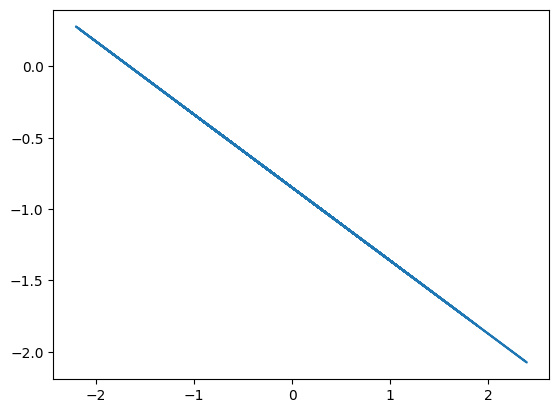

In [14]:
plt.plot(x, model(X, theta))

In [15]:
def cost_function(X, y, theta):
    m = len(y)
    return (1/(2*m) * np.sum((model(X, theta) - y) ** 2))

In [16]:
cost_function(X, y, theta)

np.float64(1473.5701358367128)

In [17]:
def grad(X, y , theta):
    m = len(y)
    return (1/m) * X.T.dot(model(X, theta) - y)

In [25]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):

    cost_history = np.zeros(n_iterations)
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

In [26]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)

In [23]:
theta_final

array([[55.73445725],
       [ 0.36526942]])

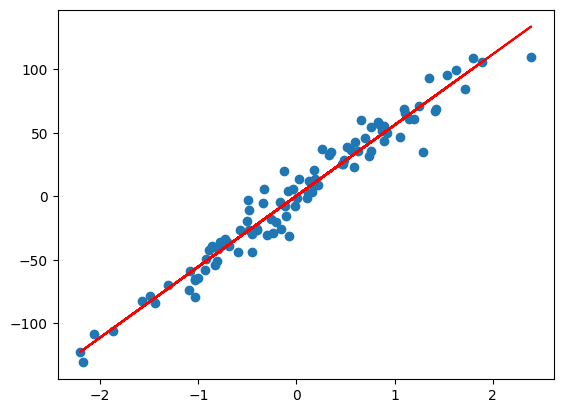

In [24]:
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, color='red')

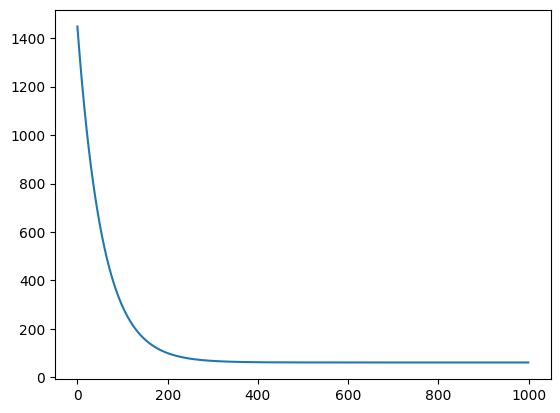

In [27]:
plt.plot(range(1000), cost_history)

In [28]:
def coef_determination(y, pred):
    u = ((y - pred) ** 2).sum()
    v = ((y - y.mean()) ** 2).sum()
    return 1 - u/v

In [29]:
coef_determination(y, predictions)

np.float64(0.9576423682547158)